In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [2]:
theta_list=np.arange(-np.pi, np.pi,0.1)
omega_list=np.arange(0, 5,0.1)
u_list=np.arange(-3,3,0.1)


In [3]:
def compute_reward(self, states):
        abs_q=abs(states[0])
        abs_dq=abs(states[1])

        # reward
        r = lambda q_, dq_: -(q_**2 + 0.01*dq_**2)
        if abs_q<pi*2/3:
            reward= r(abs_q,abs_dq)
        else:
            reward= r(pi*2/3,4)-1.0*(4.0-abs_dq)**2

        return reward

In [4]:
@dataclass
class Data:
    th = None
    omega = None
    u = None


In [5]:
def plot_rewards(rewards, x_list, y_list, xlabel, ylabel):
    format_values = lambda lst: [f'{x:.2f}' for x in lst]
    plt.figure(figsize=(20,10))
    y_inc=2
    x_inc=4
    _ = plt.imshow(rewards)
    _ = plt.xticks([*range(len(x_list))][::x_inc],format_values(x_list)[::x_inc])
    _ = plt.yticks([*range(len(y_list))][::y_inc],format_values(y_list)[::y_inc])
    _ = plt.colorbar()
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    

In [6]:
target_angle = np.pi

angle_reward = lambda self: -(np.abs(angle_normalize(self.th))-target_angle)**2
correctVelocity_reward = lambda self: -0.1*np.abs(self.omega)
voltage_penalty = lambda self: -0.001*(self.u)**2

reward_function = lambda self: angle_reward(self) + correctVelocity_reward(self)  + voltage_penalty(self)

In [7]:
target_angle = np.pi

def angle_normalize(x):
    return ((x + np.pi) % (2 * np.pi))-np.pi

angle_reward = lambda self: -(np.abs(angle_normalize(self.th))-target_angle)**2
correctVelocity_reward = lambda self: -0.1*np.abs(self.omega)
voltage_penalty = lambda self: -0.001*(self.u)**2

reward_function = lambda self: angle_reward(self) + correctVelocity_reward(self)  + voltage_penalty(self)

In [8]:
u_ph=0.1
th_ph=3.14
omega_ph=0.1

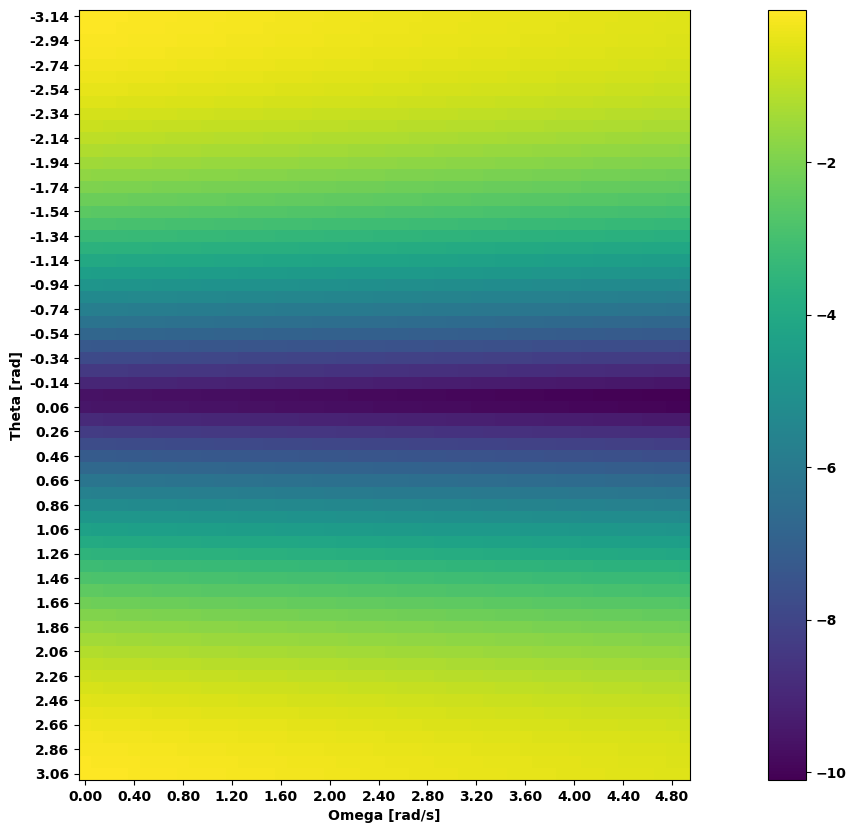

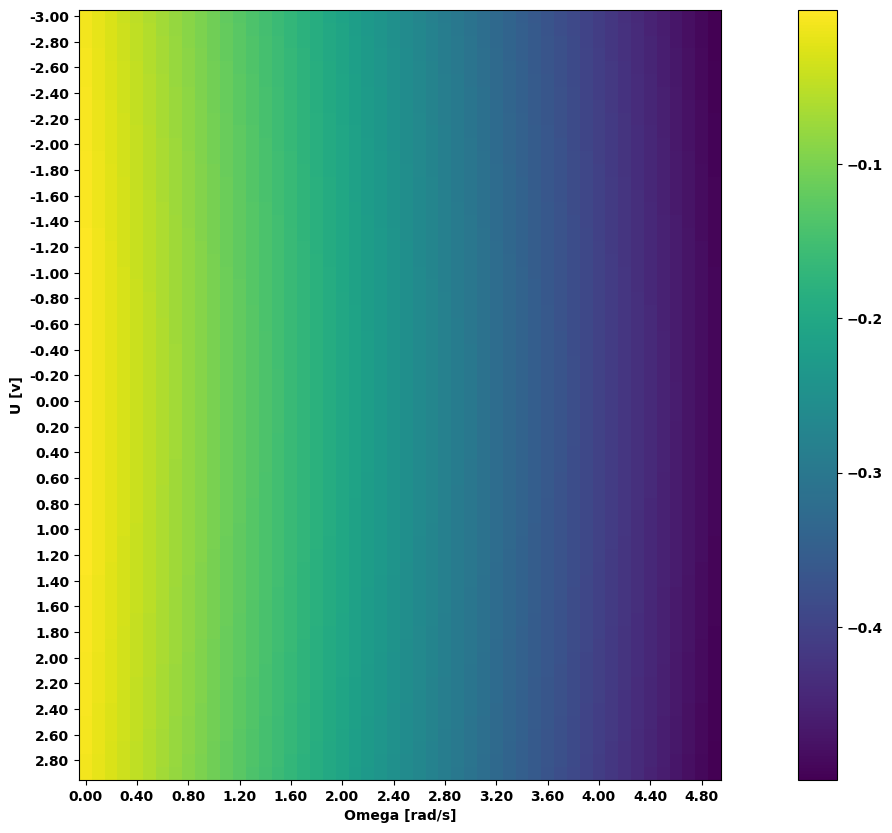

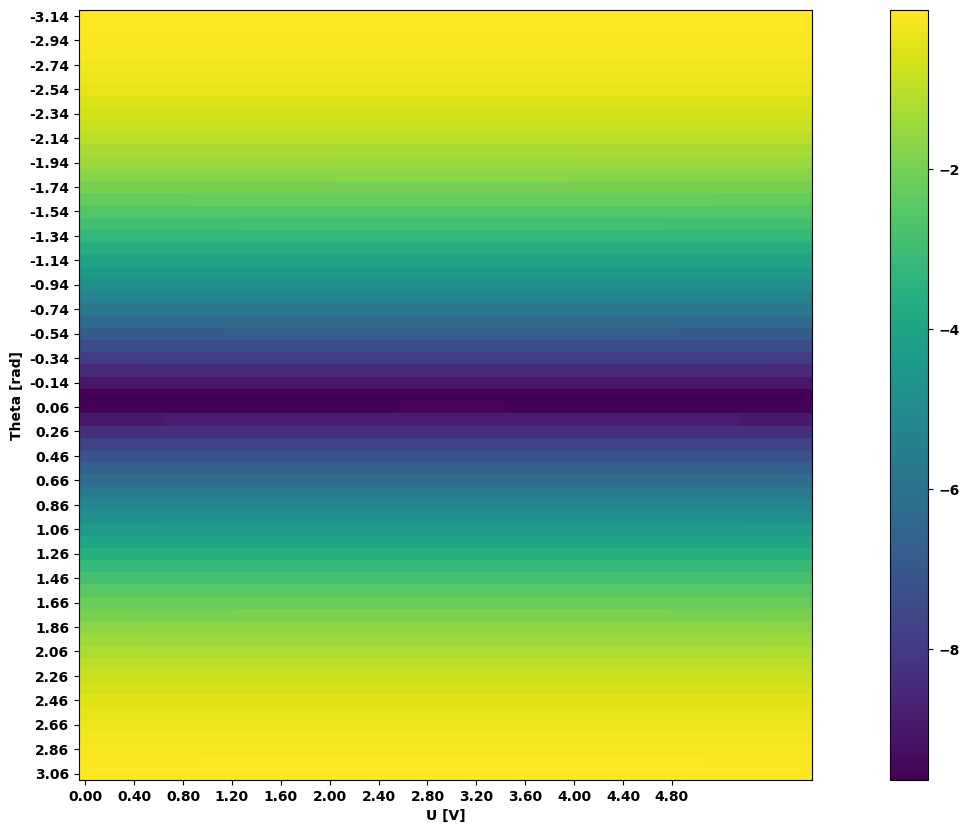

In [10]:
reward_fun = lambda self: reward_function(self)
rewards = np.ones((len(theta_list),len(omega_list)))
for i in range(rewards.shape[0]):
    for j in range(rewards.shape[1]):
        data=Data()
        data.th, data.omega=theta_list[i], omega_list[j]
        data.u=u_ph
        rewards[i,j] = reward_fun(data)
plot_rewards(rewards, omega_list, theta_list, 'Omega [rad/s]', 'Theta [rad]')
plt.show()

rewards = np.ones((len(u_list),len(omega_list)))
for i in range(rewards.shape[0]):
    for j in range(rewards.shape[1]):
        data=Data()
        data.u, data.omega=u_list[i], omega_list[j]
        data.th=th_ph
        rewards[i,j] = reward_fun(data)

plot_rewards(rewards, omega_list, u_list, 'Omega [rad/s]', 'U [v]')
plt.show()


rewards = np.ones((len(theta_list),len(u_list)))
for i in range(rewards.shape[0]):
    for j in range(rewards.shape[1]):
        data=Data()
        data.th, data.u=theta_list[i], u_list[j]
        data.omega=omega_ph
        rewards[i,j] = reward_fun(data)

plot_rewards(rewards, omega_list, theta_list, 'U [V]', 'Theta [rad]')
plt.show()

